In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset

df = pd.read_csv('dataset/toyota.csv')
df.head()



,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


## EDA (Exploratory Data Analysis)

In [3]:
# show information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [4]:
# show missing values

df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,6738.0,2016.748145,2.204062,1998.0,2016.0,2017.0,2018.00,2020.0
price,6738.0,12522.391066,6345.017587,850.0,8290.0,10795.0,14995.00,59995.0
mileage,6738.0,22857.413921,19125.464147,2.0,9446.0,18513.0,31063.75,174419.0
tax,6738.0,94.697240,73.880776,0.0,0.0,135.0,145.00,565.0
mpg,6738.0,63.042223,15.836710,2.8,55.4,62.8,69.00,235.0
engineSize,6738.0,1.471297,0.436159,0.0,1.0,1.5,1.80,4.5


<AxesSubplot:>

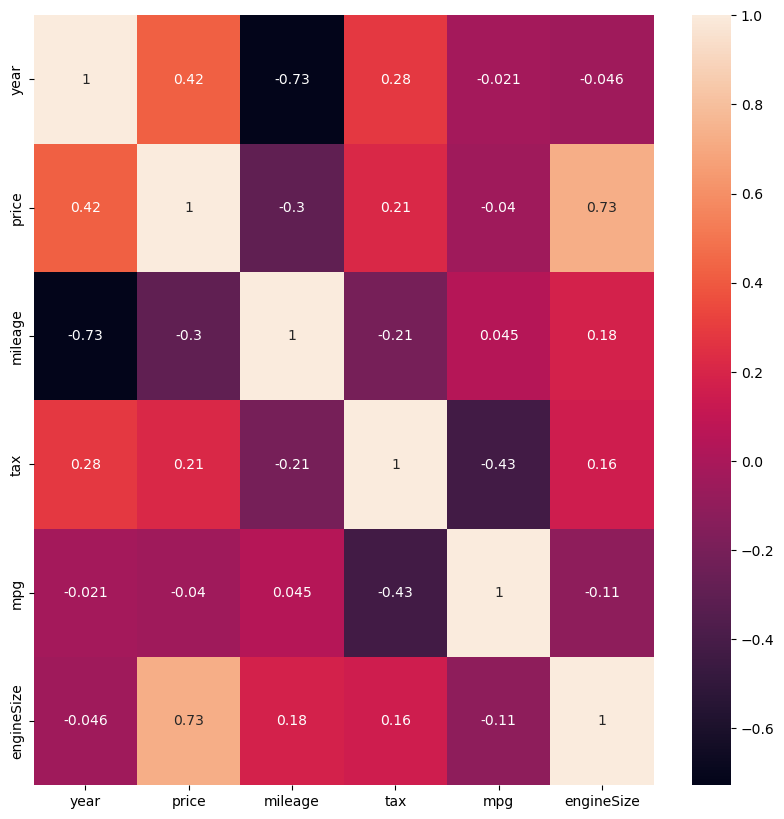

In [6]:
# show correlation

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

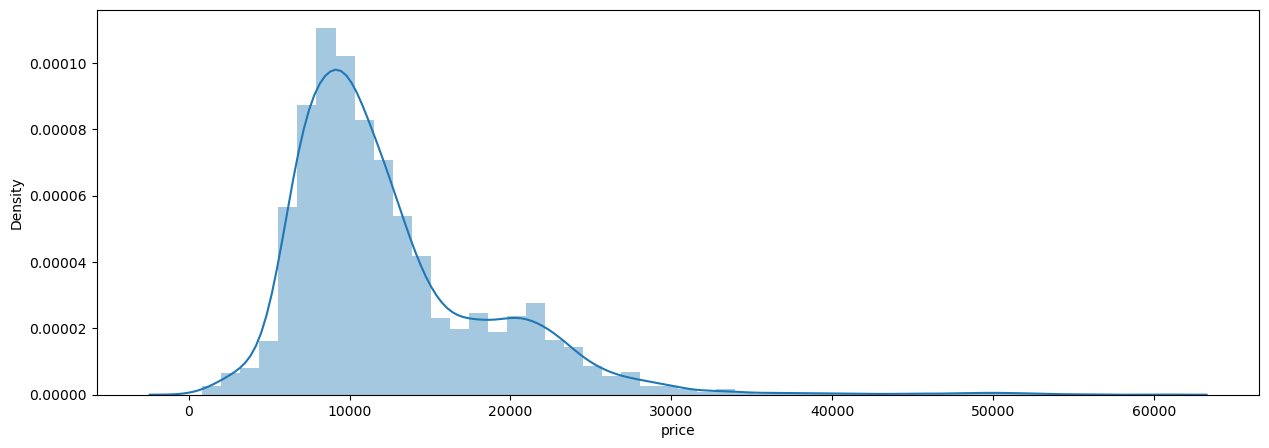

In [7]:
# show price distribution

plt.figure(figsize=(15,5))
sns.distplot(df['price'])


### Feature Selection

In [8]:
features = ['year','mileage','tax','mpg','engineSize']
x= df[features]
y = df['price']
x.shape, y.shape

((6738, 5), (6738,))

In [9]:
#split train and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5390, 5), (1348, 5), (5390,), (1348,))

In [10]:
# linial regression

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)


In [11]:
score = lm.score(X_test, y_test)
print('akurasi model = ', score)

akurasi model =  0.7658935417346286


In [12]:

dummy_data = np.array([[2017,26000,100,36.2,2]])

prediction = lm.predict(dummy_data)
print('Perkiraan harga mobil dalam EUR = ', prediction)

Perkiraan harga mobil dalam EUR =  [17946.37502962]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:
# save model

import pickle
filename = 'car_price_model.sav'
pickle.dump(lm, open(filename, 'wb'))